# Feature identification in a satelite image
#### Satellite Image Segmentation using K-Means Clustering



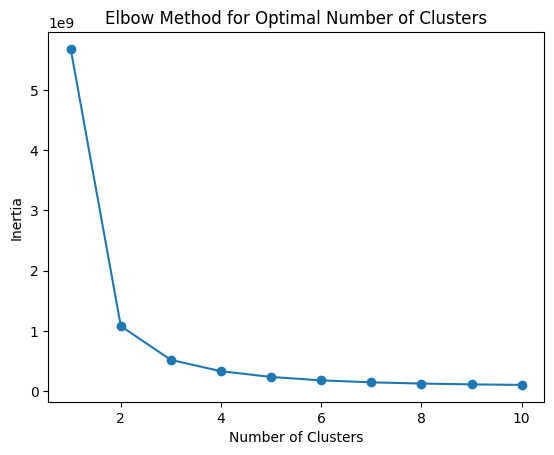

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

img = plt.imread("sas_geospatial_high-res_jeju1.jpg")

r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

r_flat, g_flat, b_flat = r.flatten(), g.flatten(), b.flatten()

r_list, g_list, b_list = [], [], []

for i in range(len(r_flat)):
    r_list.append(r_flat[i])
    g_list.append(g_flat[i])
    b_list.append(b_flat[i])

r_array, g_array, b_array = np.array(r_list), np.array(g_list), np.array(b_list)

pixels = pd.DataFrame({'red': r_array, 'green': g_array, 'blue': b_array})


n_clusters = range(1, 11)

inertias = []

for i in n_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pixels)
    inertias.append(kmeans.inertia_)

plt.plot(n_clusters, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


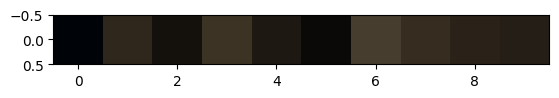

In [24]:
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

colors = [] 
for cluster_center in kmeans.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()




InvalidIndexError: (slice(None, None, None), 0)

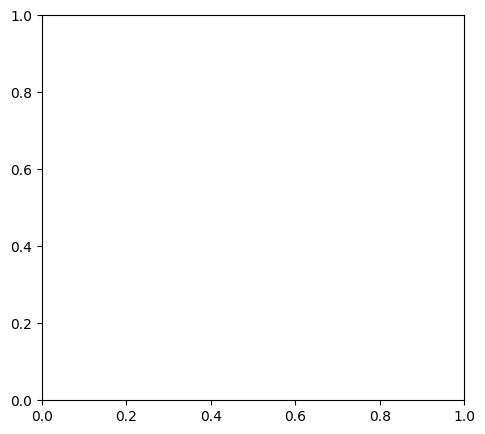

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pixels)
kmeans.cluster_centers_
pred = kmeans.fit_predict(pixels)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(pixels[:,0],pixels[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

